# Exploratory analysis on 2019 players scouts

It uses cartoleiro class that impements all the reading from API and consolidation of season data.

From begining, it initializes cartoleiro class to a cart object and show the columns from scout_table.

In [1]:
import cartoleiro

cart = cartoleiro.Cartoleiro(True)
cart.scout_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20613 entries, 0 to 20612
Data columns (total 29 columns):
rodada_id       20613 non-null int64
atleta_id       20613 non-null int64
A               3179 non-null float64
CA              6925 non-null float64
CV              698 non-null float64
DD              929 non-null float64
DP              151 non-null float64
FC              10964 non-null float64
FD              7107 non-null float64
FF              8430 non-null float64
FS              11115 non-null float64
FT              1483 non-null float64
G               3797 non-null float64
GC              173 non-null float64
GS              938 non-null float64
I               3644 non-null float64
PE              11904 non-null float64
PP              252 non-null float64
RB              10477 non-null float64
SG              3576 non-null float64
apelido         20613 non-null object
clube_id        20613 non-null int64
jogos_num       20613 non-null int64
media_num       20613 n

In [2]:
cart.rounds_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 42 columns):
Unnamed: 0                                                      260 non-null int64
Unnamed: 0.1                                                    250 non-null float64
Unnamed: 0.1.1                                                  240 non-null float64
Unnamed: 0.1.1.1                                                230 non-null float64
Unnamed: 0.1.1.1.1                                              220 non-null float64
Unnamed: 0.1.1.1.1.1                                            210 non-null float64
Unnamed: 0.1.1.1.1.1.1                                          200 non-null float64
Unnamed: 0.1.1.1.1.1.1.1                                        190 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1                                      180 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1                                    170 non-null float64
Unnamed: 0.1.1.1.1.1.1.1.1.1.1                 

In [3]:
teams = cart.read_teams()
teams = teams.set_index("id")
teams[["abreviacao", "nome"]]

,abreviacao,nome
id,,
262,FLA,Flamengo
263,BOT,Botafogo
264,COR,Corinthians
265,BAH,Bahia
266,FLU,Fluminense
267,VAS,Vasco
275,PAL,Palmeiras
276,SAO,São Paulo
277,SAN,Santos


In [4]:
import pandas as pd

atletas_temp = cart.scout_table[["rodada_id", "atleta_id", "clube_id", "apelido", "posicao_id", "pontos_num", 
                                 "jogos_num"]]
lista = atletas_temp.set_index(["atleta_id", "rodada_id"])
atletas = pd.DataFrame()
for atleta in lista.index.get_level_values(0).unique():
    # .copy(deep=True) to supress SettingWithCopyWarning
    df = atletas_temp[atletas_temp.atleta_id == atleta].copy(deep=True) 
    # test to flag the player who plays in a specific round
    df["jogou"] = (df["jogos_num"].diff() != 0) & (df["jogos_num"] != 0)
    atletas = pd.concat([atletas, df], axis=0)
# discard rows where player didnt play the match
atletas = atletas[atletas.jogou]

atletas[["pontos_num"]].agg(["count","mean", "std", "min", "median", "max"])

,pontos_num
count,7540.000000
mean,2.975365
std,4.075509
min,-9.300000
median,2.035000
max,37.700000


<IPython.core.display.Javascript object>


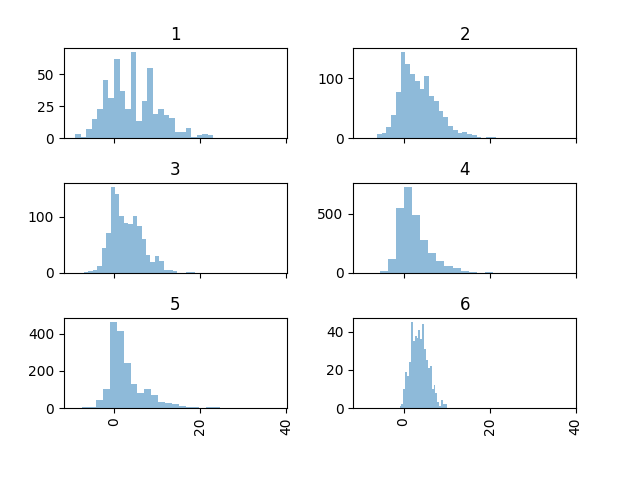

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cfdc748>,
      dtype=object)

In [22]:
%matplotlib notebook

#atletas.boxplot(column="pontos_num", by="posicao_id")
atletas.hist(column="pontos_num", by="posicao_id", bins=25, alpha=0.5, layout=(3,2), sharex=True, sharey=False)

In [21]:
atletas.groupby("posicao_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
posicao_id,,,,,,
1,513,4.307992,5.770256,-9.00,4.00,23.00
2,1085,3.497235,4.252368,-6.20,2.90,21.40
3,1079,2.861260,3.692290,-7.00,2.30,18.70
4,2595,2.455877,3.702697,-9.30,1.50,37.70
5,1778,2.889989,4.385306,-9.00,1.60,31.00
6,490,3.736837,1.981868,-0.92,3.61,10.02


In [7]:
atletas.groupby("rodada_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
rodada_id,,,,,,
1,284,3.027289,4.516114,-9.0,1.80,22.7
2,285,2.755579,3.900233,-6.6,2.00,21.0
3,285,3.033649,3.875692,-5.6,2.00,18.8
4,283,3.073710,3.886629,-5.7,2.10,22.1
5,285,3.090982,3.976333,-4.1,2.30,23.2
6,300,2.788133,4.072469,-9.0,2.00,22.2
7,270,3.064185,3.942631,-9.3,2.40,17.9
8,298,3.019899,4.016848,-4.9,2.20,21.8
9,298,2.914128,4.053310,-7.0,1.90,18.6


In [8]:
(atletas.groupby("clube_id")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"]).
 sort_values("mean", ascending=False)).join(teams["abreviacao"])[["abreviacao","count","mean", 
                                                                  "std", "min", "median", "max"]]


,abreviacao,count,mean,std,min,median,max
clube_id,,,,,,,
262,FLA,387,4.345685,5.361192,-6.1,3.10,37.7
277,SAN,387,3.669457,4.510348,-9.0,3.00,24.1
284,GRE,389,3.642596,4.364880,-5.5,2.40,23.3
265,BAH,389,3.532134,4.117405,-5.2,2.60,22.4
285,INT,389,3.450951,3.963351,-5.8,2.80,20.0
275,PAL,298,3.385235,4.249457,-6.0,2.50,22.9
264,COR,360,3.302722,4.025387,-5.5,2.50,20.5
290,GOI,374,3.131390,4.250791,-9.0,2.50,21.5
276,SAO,374,3.071711,4.135831,-6.6,2.20,23.5


In [9]:
home = cart.rounds_table[["rodada_id", "clube_casa_id"]].copy(deep=True) 
home.loc[:,"home_guest"] = len(home)*["H"]
new_atletas = atletas.merge(home, how="left", left_on=["rodada_id", "clube_id"], 
                            right_on=["rodada_id", "clube_casa_id"])
new_atletas["home_guest"] = new_atletas["home_guest"].fillna("G")
new_atletas.groupby("home_guest")["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

,count,mean,std,min,median,max
home_guest,,,,,,
G,3779,2.553096,3.862557,-9.3,1.7,23.3
H,3761,3.399654,4.237149,-7.0,2.5,37.7


<IPython.core.display.Javascript object>


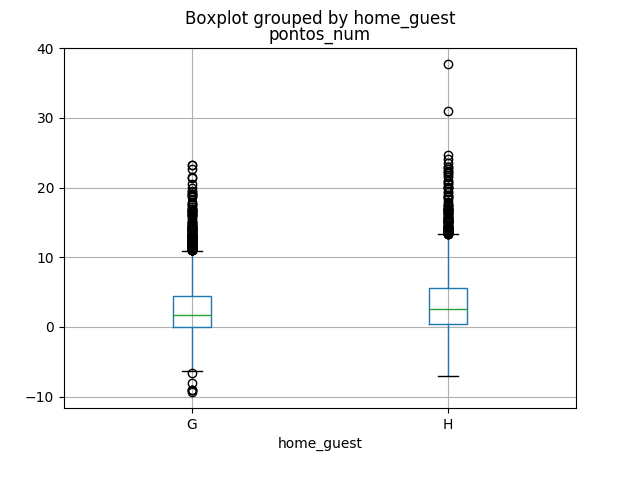

In [10]:
import matplotlib.pyplot as plt

#new_atletas.hist(column="pontos_num", by="home_guest", ax=ax, sharex=True, sharey=True, bins=50, alpha=0.5)
new_atletas.boxplot(column="pontos_num", by="home_guest")

In [11]:
new_atletas.groupby(["posicao_id", "home_guest"])["pontos_num"].agg(["count","mean", "std", "min", "median", "max"])

count      mean       std   min  median    max
posicao_id home_guest                                                
1          G             258  4.315116  6.126377 -9.00   3.700  22.70
           H             255  4.300784  5.398162 -6.60   4.500  23.00
2          G             553  3.015732  4.156764 -5.80   2.300  21.40
           H             532  3.997744  4.296510 -6.20   3.700  20.70
3          G             554  2.239711  3.567623 -6.00   1.200  16.70
           H             525  3.517143  3.711434 -7.00   3.200  18.70
4          G            1290  2.165116  3.348945 -9.30   1.500  19.10
           H            1305  2.743295  4.002502 -6.30   1.700  37.70
5          G             880  2.328182  3.919277 -9.00   1.300  23.30
           H             898  3.440535  4.736220 -6.90   2.000  31.00
6          G             244  3.215369  1.886464 -0.17   2.925   9.45
           H             246  4.254065  1.941762 -0.92   4.220  10.02

In [12]:
new_atletas.groupby(["clube_id", 
                     "home_guest"])["pontos_num"].agg(["count", "mean", "std", "min", "median", 
                                                       "max"])

count      mean       std  min  median   max
clube_id home_guest                                              
262      G             210  3.966286  4.866032 -6.1   2.600  19.0
         H             177  4.795819  5.877396 -3.8   4.100  37.7
263      G             210  2.381857  3.587646 -4.8   1.200  14.9
         H             178  2.380393  4.077940 -6.6   1.500  19.4
264      G             180  2.744222  3.997617 -5.5   1.750  20.5
         H             180  3.861222  3.986193 -4.1   3.285  18.7
265      G             194  3.531443  4.215938 -5.2   2.700  19.1
         H             195  3.532821  4.027846 -5.0   2.500  22.4
266      G             163  2.330368  4.243966 -9.3   1.700  19.4
         H             205  2.897268  3.760714 -5.8   2.300  18.9
267      G             164  1.925427  3.583937 -5.7   1.400  12.5
         H             210  2.761190  3.437062 -4.6   2.000  14.0
275      G             163  2.618344  3.746149 -6.0   1.900  14.4
         H             135  4.311185  4.634502 -5.0   3.400  22.9
276      G             180  2.350444  3.740502 -6.6   1.500  21.4
         H             194  3.740928  4.375641 -4.1   3.055  23.5
277      G             195  2.864359  3.816997 -9.0   2.100  15.7
         H             192  4.487135  4.998034 -6.3   3.665  24.1
282      G             195  2.492923  3.523239 -4.8   1.900  16.7
         H             179  3.289609  4.181450 -4.1   2.300  15.8
283      G             193  2.023679  3.479804 -5.1   1.200  16.0
         H             195  3.097641  3.973868 -4.9   2.020  21.0
284      G             194  3.200103  4.064139 -4.0   2.200  23.3
         H             195  4.082821  4.613206 -5.5   3.100  21.5
285      G             194  2.566186  3.622726 -5.8   2.150  20.0
         H             195  4.331179  4.098560 -2.9   3.900  18.6
290      G             179  2.848883  4.218719 -9.0   2.000  21.5
         H             195  3.390718  4.274384 -7.0   2.800  17.1
293      G             210  2.586429  4.334148 -5.5   1.500  19.5
         H             165  3.311091  4.193742 -4.3   2.500  18.8
314      G             195  2.458256  3.593735 -8.0   1.800  22.7
         H             194  2.321186  3.489605 -6.3   2.000  20.0
315      G             194  2.008299  3.468786 -6.3   1.400  17.2
         H             178  2.944494  3.584911 -5.5   2.400  17.0
341      G             180  1.693889  3.101388 -6.0   1.150  12.2
         H             209  3.008373  4.053506 -4.0   2.100  23.0
354      G             194  2.010206  3.297428 -5.0   1.500  19.1
         H             195  3.445590  4.189584 -3.3   2.500  24.7
356      G             192  2.185625  3.602606 -5.6   1.550  23.2
         H             195  2.412000  3.599759 -5.5   1.500  17.4

In [13]:
most_pointers = new_atletas[(new_atletas.pontos_num > 15)]
most_pointers = pd.concat([most_pointers.groupby(["posicao_id"])["pontos_num"].agg(["count"]),
                          atletas.groupby("posicao_id")["pontos_num"].agg(["count"])], axis=1)

most_pointers.columns.values[1] = "total"
most_pointers["proportion"] = most_pointers["count"] / most_pointers["total"]
most_pointers

,count,total,proportion
posicao_id,,,
1,21.0,513,0.040936
2,13.0,1085,0.011982
3,3.0,1079,0.002780
4,23.0,2595,0.008863
5,39.0,1778,0.021935
6,NaN,490,NaN


In [14]:
new_atletas[(new_atletas.pontos_num < -1)].sort_values("pontos_num", ascending=False).tail(20)

,rodada_id,atleta_id,clube_id,apelido,posicao_id,pontos_num,jogos_num,jogou,clube_casa_id,home_guest
5293,21,42499,285,Bruno,2,-5.8,6,True,NaN,G
7320,17,90118,290,Yago Rocha,2,-5.8,4,True,NaN,G
4739,1,69010,341,João Carlos,1,-6.0,1,True,NaN,G
6838,17,71631,275,Weverton,1,-6.0,11,True,NaN,G
3587,11,97528,266,Frazan,3,-6.0,3,True,NaN,G
2923,11,85300,262,Berrío,5,-6.1,7,True,NaN,G
1957,13,42208,314,André Moritz,4,-6.1,4,True,314.0,H
6956,14,69177,314,Léo,2,-6.2,5,True,314.0,H
1673,18,38311,315,Márcio Araújo,4,-6.3,18,True,NaN,G
1308,18,89815,314,Gustavo Ferrareis,4,-6.3,7,True,314.0,H
